In [41]:
%pip install aif360

Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

display(Markdown('# Start Coding'))

# Start Coding

In [43]:
data_ricci=pd.read_csv('data/Ricci/ricci_processed.csv')
data_ricci

,Position,Oral,Written,Race,Combine,Promotion
0,Captain,89.52,95,W,92.808,Promotion
1,Captain,80.00,95,W,89.000,Promotion
2,Captain,82.38,87,W,85.152,Promotion
3,Captain,88.57,76,W,81.028,Promotion
4,Captain,76.19,84,W,80.876,Promotion
...,...,...,...,...,...,...
113,Lieutenant,40.83,64,H,54.732,No promotion
114,Lieutenant,52.08,56,B,54.432,No promotion
115,Lieutenant,48.33,58,H,54.132,No promotion
116,Lieutenant,52.92,49,B,50.568,No promotion


In [44]:
data_ricci.groupby('Race').describe()

Oral                                                              \
     count       mean        std    min     25%    50%      75%    max   
Race                                                                     
B     27.0  63.952222  10.974650  45.83  55.415  61.25  70.6550  92.08   
H     23.0  57.036957  10.990928  40.83  49.375  56.25  64.8200  79.05   
W     68.0  69.017647  12.039179  44.58  58.645  71.67  77.7075  89.52   

     Written             ...              Combine                       \
       count       mean  ...    75%   max   count       mean       std   
Race                     ...                                             
B       27.0  63.592593  ...  71.50  86.0    27.0  63.736444  8.744066   
H       23.0  70.869565  ...  73.50  84.0    23.0  65.336522  7.142540   
W       68.0  75.117647  ...  82.25  95.0    68.0  72.677647  8.834185   

                                              
         min     25%     50%     75%     max  
Race                                          
B     45.932  57.662  61.068  72.030  76.600  
H     54.132  60.078  65.000  69.946  79.676  
W     56.324  68.015  71.642  78.451  92.808  

[3 rows x 24 columns]

In [45]:
data_ricci.groupby(['Position', 'Race']).describe()['Combine']

count       mean       std     min     25%     50%     75%  \
Position   Race                                                               
Captain    B       8.0  63.782000  8.492689  51.304  57.594  63.900  70.742   
           H       8.0  68.546500  8.701684  57.344  61.685  67.524  76.615   
           W      25.0  74.112800  8.251842  56.324  69.372  73.732  78.124   
Lieutenant B      19.0  63.717263  9.076899  45.932  58.132  61.068  72.482   
           H      15.0  63.624533  5.768875  54.132  60.000  63.268  68.666   
           W      43.0  71.843256  9.145921  56.632  66.434  70.732  78.766   

                    max  
Position   Race          
Captain    B     74.952  
           H     79.676  
           W     92.808  
Lieutenant B     76.600  
           H     71.200  
           W     90.100

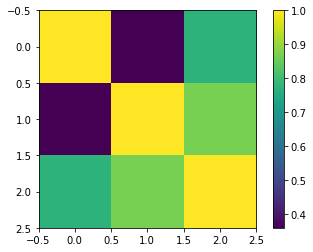

In [46]:
plt.imshow(data_ricci.corr(numeric_only=True))
plt.colorbar()
plt.show()

## aif360

In [47]:
import aif360
import aif360.metrics
import aif360.datasets

In [48]:
data_ricci=pd.read_csv('data/Ricci/ricci_processed.csv')
data_ricci= data_ricci.replace(['W','B','H','Captain','Lieutenant'],[1,0,0,1,0])
data_ricci= data_ricci.replace(['Promotion','No promotion'],[1,0])

In [49]:
sensitive_attribute = 'Race'
protected_attribute= ['Race']
privileged_group = [{'Race':1}]
unprivileged_group = [{'Race':0}]

In [50]:
dataset= aif360.datasets.BinaryLabelDataset(favorable_label=1, 
                                 unfavorable_label=0,
                                 df = data_ricci, 
                                 label_names= ['Promotion'], 
                                 protected_attribute_names=protected_attribute)

In [51]:
metric = aif360.metrics.BinaryLabelDatasetMetric(dataset, 
                                         unprivileged_groups=unprivileged_group,
                                         privileged_groups=privileged_group)

In [52]:
print(metric.num_instances())
print(metric.num_negatives())
print(metric.num_positives())

118.0
62.0
56.0
